In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()
sns.set_style("ticks")
sns.despine()

%matplotlib inline

## Read in the data


In [2]:
df = pd.read_csv("data/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data summary

Below, the DataFrame has been summarized. From this summary and the above `head()` output, we can conclude that:

1. `Age`, `Cabin` and `Embarked` are the only columns with null values. `Cabin` is null for most rows in the data.
2. `PassengerId` is a redundant column since Pandas already has a 0-based index on the DataFrame.
3. `Name`, `Ticket` and `Cabin` cannot be used in a model in any meaningful way and can be dropped without loss of features to make an accurate prediction. Dropping `Cabin` has another benefit of reducing the null-value problem in the dataset.


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We will also convert the `Survived` column to bool for more interpretability.


In [4]:
df["Survived"] = df["Survived"].astype(bool)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Removing columns based on the above analysis
# We will not drop the name for reference purposes
df = df.drop(["Ticket", "PassengerId", "Cabin"], axis=1)
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,False,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Type of Features


### Categorical/Ordinal Features

To determine which of the features are categorical/ordinal (other than the target `Survived`), we can use `value_counts()`. From the outputs, we can see that `PClass`, `SibSp`, and `Parch` are all ordinal features. `Sex` and `Embarked` are categorical.

`Embarked` (`S`/`C`/`Q`) and `Sex` (`male`/`female`) are not encoded in a way that can be used in a model.

Also, all these features have a class imbalance. We might need to handle this depending on the model used.


In [6]:
df["Pclass"].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df["Sex"].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [8]:
df["SibSp"].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df["Parch"].value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
df["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Numerical features

All other columns are numerical. Therefore, the only numerical columns are `Age` and `Fare`.


## Per-feature insights


### `Age`


#### Null values

We can see that `Age` has about 20% null values.


In [11]:
# .isna().sum() gives the number of nulls in Age
# / len(df) gives it as a proportion of the entire dataframe
(df["Age"].isna().sum() / len(df)) * 100


19.865319865319865

#### Summary statistics

We can use `.describe()` to get summary statistics (ignoring nulls) for the feature. This has interesting insights:

- 50% of the people on the Titanic were below the age of 28.
- The average age of a person on board the Titanic was ~30 years.
- The oldest person on the Titanic (in this dataset and assuming none of the nulls were actually older) was 80 years old.


In [12]:
df["Age"].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Distribution

We visualize the `Age` feature as a density plot. The distribution is very close to normal, which is a good sign since we don't need to apply any transformations on this column for better learning in case of non-tree based algorithms. If we use an algorithm like XGBoost, we don't need to worry about nulls either.


<AxesSubplot:xlabel='Age', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

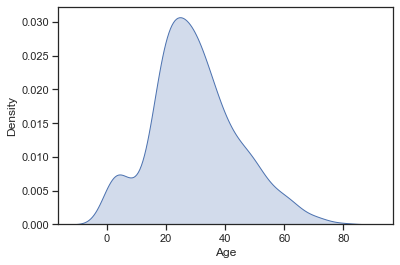

In [13]:
sns.kdeplot(df["Age"], fill=True)


#### Distribution by target

Below, we visualize the distribution of `Age` for each value of `Survived`.

By the looks of it, there does seem to be a significant difference in survival rates with respect to the age of the passengers. This indicates that `Age` is a good feature.


<AxesSubplot:xlabel='Age', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

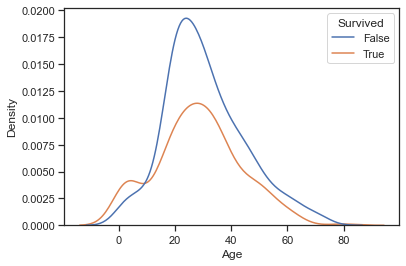

In [14]:
sns.kdeplot(data=df, x="Age", hue="Survived")


<AxesSubplot:xlabel='Age', ylabel='Count'>

<Figure size 432x288 with 1 Axes>

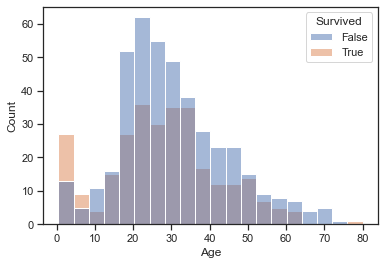

In [15]:
sns.histplot(data=df, x="Age", hue="Survived")

#### Null values and survivability

Below, we visualize the survivability rates among the null values. Most of the people with no recorded age did not survive.


<AxesSubplot:xlabel='Survived', ylabel='count'>

<Figure size 432x288 with 1 Axes>

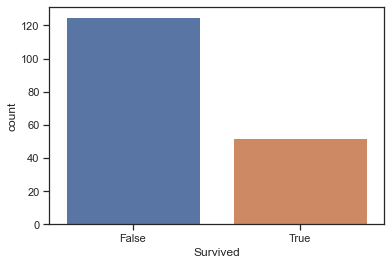

In [16]:
age_df = df[df["Age"].isna()]
sns.countplot(data=age_df, x="Survived")


Let's also take a look at their ticket classes. Most of them (136) were travelling on a third-class ticket.


In [17]:
age_df["Pclass"].value_counts()


3    136
1     30
2     11
Name: Pclass, dtype: int64

### `Fare`

`Fare` is a feature where we are likely to see some of the impacts of the financial status of passengers on their survivability rates.


#### Null values

`Fare` doesn't have any null-values.


In [18]:
(df["Fare"].isna().sum() / len(df)) * 100


0.0

#### Summary statistics

The summary statistics suggest the following:

- Most of the passengers paid a fare below £31 (£3,772.84 in today's money).
- The variance is very high as is evident from the `max` of £512.33 (£62,352.87 in today's money) and the `std` of £49.69 (£6,047.50 in today's money).
- There were people on board the titanic who did not pay any fare since the `min` is £0.


In [19]:
df["Fare"].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Let's take a deeper look at the passengers who did not pay any fare. Only 15 passengers did not pay any fare. I wonder how many of them survived.


In [20]:
zero_fare = df[df["Fare"] == 0.0]
len(zero_fare)


15

Only 1 passenger survived while the rest perished.


In [21]:
zero_fare["Survived"].value_counts()


False    14
True      1
Name: Survived, dtype: int64

Let's take a look at ticket class. Interestingly, most of these people were travelling on 1st or 2nd class tickets. Maybe they were crew members like the captain or the head architect.

> Note: There is a discussion on Kaggle (https://www.kaggle.com/c/titanic/discussion/36335) about this. Someone found that at least one of these 15 passengers actually did pay for a ticket. There is no consensus regarding this discrepancy.


In [22]:
zero_fare["Pclass"].value_counts()


2    6
1    5
3    4
Name: Pclass, dtype: int64

Let's also take a closer look at passengers who paid at least £500 (£60,852.25 in today's money) to get on board the Titanic. There were only 3 such passengers!


In [23]:
more_than_500 = df[df["Fare"] >= 500]
len(more_than_500)


3

What about their survivor rates? No deaths here. All 3 of them survived.


In [24]:
more_than_500["Survived"].value_counts()


True    3
Name: Survived, dtype: int64

What about their ticket classes? All 1st class, of course.


In [25]:
more_than_500["Pclass"].value_counts()


1    3
Name: Pclass, dtype: int64

#### Distribution

Most of the passengers paid low fares between £0 and £100 (£12,170.45 in today's money) to get on board the titanic. This also shows that it would be better to apply some transformation on this data for better learning for non-tree based models.


<AxesSubplot:xlabel='Fare', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

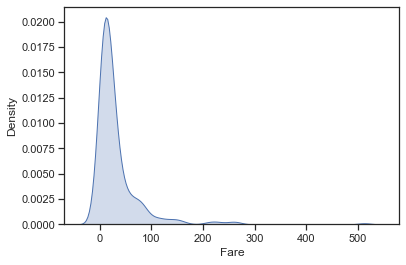

In [26]:
sns.kdeplot(data=df, x="Fare", fill=True)


(1.2864869796569736, 1.1890465283525415, 0.9566485792052033)

<Figure size 432x288 with 1 Axes>

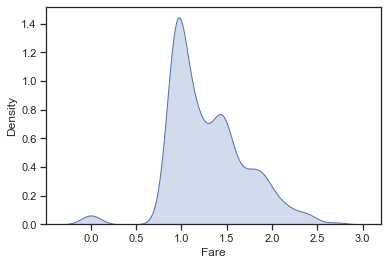

In [27]:
# log transformation
# Add a constant to remove divide by 0
transformed = np.log10(df["Fare"] + 1)
sns.kdeplot(x=transformed, fill=True)

vals, counts = np.unique(transformed, return_counts=True)
mode = vals[counts.argmax()]

transformed.mean(), np.median(transformed), mode

<AxesSubplot:xlabel='Fare', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

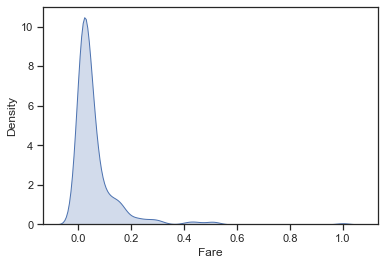

In [28]:
# MinMax normalization
# Didn't make a lot of difference
maximum = df["Fare"].max()
minimum = df["Fare"].min()
transformed = (df["Fare"] - minimum) / (maximum - minimum)
sns.kdeplot(x=transformed, fill=True)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

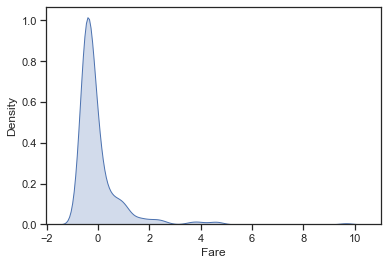

In [29]:
# Standardization
# Did not make a lot of difference
mean = df["Fare"].mean()
std = df["Fare"].std()
transformed = (df["Fare"] - mean) / std
sns.kdeplot(x=transformed, fill=True)


(4.286898224977211, 3.6933514409718082, 2.6790672715150095)

<Figure size 432x288 with 1 Axes>

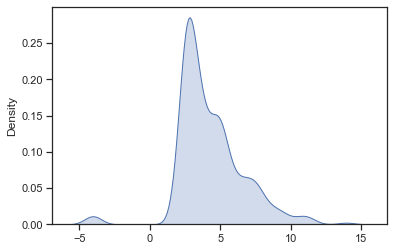

In [30]:
# Boxcox transformation
# Requires scipy
# This might produce the best result
# In this case, the log transform seems to produce a more normal distribution
from scipy.stats import boxcox

# Add a small constant since boxcox requires > 0 values
transformed = boxcox(df["Fare"].values + 1e-5)[0]
sns.kdeplot(x=transformed, fill=True)

vals, counts = np.unique(transformed, return_counts=True)
mode = vals[counts.argmax()]

transformed.mean(), np.median(transformed), mode


#### Distribution by target

As expected, most of the people who paid low fares did not survive. Even more interestingly, we can clearly see the amount of fare after which every passenger survived. This paints a very clear picture of the class hierarchy of passengers on board the Titanic.

Moreover, it is clear that `Fare` is a good feature.


<AxesSubplot:xlabel='Fare', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

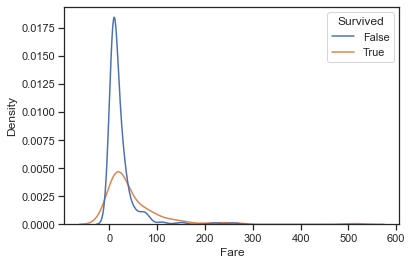

In [31]:
sns.kdeplot(data=df, x="Fare", hue="Survived")


<AxesSubplot:xlabel='Fare', ylabel='Count'>

<Figure size 432x288 with 1 Axes>

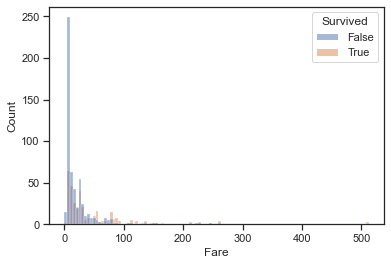

In [32]:
sns.histplot(data=df, x="Fare", hue="Survived")

### `Sex`

This is likely to be another feature which shows a strong difference in survivability rates.


#### Null values

Thankfully, there are no nulls in this features.


In [33]:
(df["Sex"].isna().sum() / len(df)) * 100


0.0

#### Summary statistics

The summary statistics shows that most of the passengers (577) were male.


In [34]:
df["Sex"].describe()


count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

#### Distribution by target

Most of the male passengers did not survive, while most of the female passengers did. This suggests that women were prioritized during evacuation, leading to a higher survivability rate.

This also shows that `Sex` is a good feature.


<seaborn.axisgrid.FacetGrid object at 0x7ff347dc5790>

<Figure size 426.35x360 with 1 Axes>

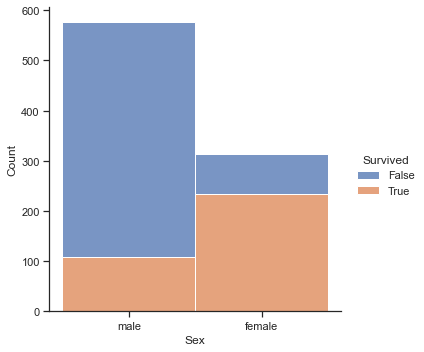

In [35]:
sns.displot(data=df, x="Sex", hue="Survived", multiple="stack")


### `Pclass`

This should be another feature which highlights the class hierarchy of passengers on board the Titanic.


#### Null values

There are no null values.


In [36]:
(df["Pclass"].isna().sum() / len(df)) * 100


0.0

#### Summary statistics

Most passengers (491) on the Titanic were travelling on a third-class ticket.


In [37]:
df["Pclass"].astype("category").describe()


count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64

#### Distribution by target

Here, the class hierarchy among passengers is very clear:

- Though the difference isn't a lot, most first-class passengers survived the sinking.
- There is almost no difference in survivability rates of second-class passengers. Almost the same number of people perished as survived.
- The biggest difference is in the third-class passengers. An overwhelming majority of them did not survive the sinking.


This also shows that `Pclass` is a good feature.

<seaborn.axisgrid.FacetGrid object at 0x7ff347d1ee80>

<Figure size 426.35x360 with 1 Axes>

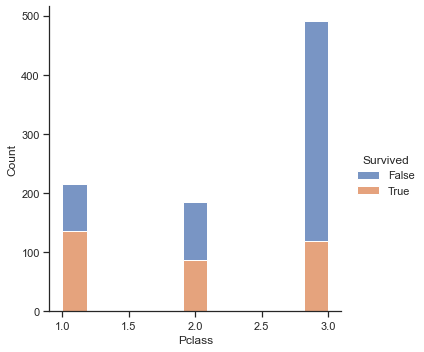

In [38]:

sns.displot(data=df, x="Pclass", hue="Survived", multiple="stack")


### `Embarked`

For some reason, more people among those who embarked from Southampton did not survive. The other two places (Cherbourg and Queenstown) have very small differences and do not contribute as much to survivability rates.

<seaborn.axisgrid.FacetGrid object at 0x7ff347e78a00>

<Figure size 426.35x360 with 1 Axes>

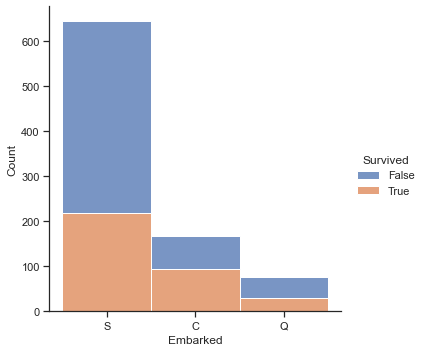

In [39]:
sns.displot(data=df, x="Embarked", hue="Survived", multiple="stack")

#### Southampton: A closer look

It seems that the difference in survivability rate is primarily because most of the people embarked from Southampton, thus making it more likely for non-survivors to have this as the value of `Embarked`. It might make sense to actually decrease the weighage of Southampton so that the model doesn't develop a bias towards it.

In [40]:
southampton = df[df["Embarked"] == "S"]
len(southampton)

644

### Feature-to-feature interactions

#### `Age` and `Fare` 

Let's plot `Age` and `Fare` in a scatterplot and color the values by `Survived`.

This suggests the following:
- `Age` and `Fare` are not very correlated.
- `Fare` seems to be much more important in determining survivability than `Age` since people having same age but different fares have different survivability rates, while people with the same fare but different ages have similar survivability rates.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

<Figure size 432x288 with 1 Axes>

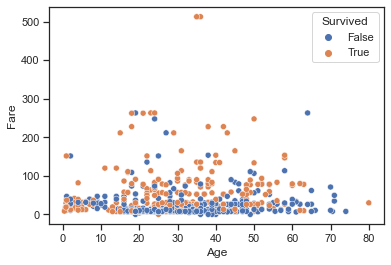

In [41]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived")

<Figure size 432x288 with 2 Axes>

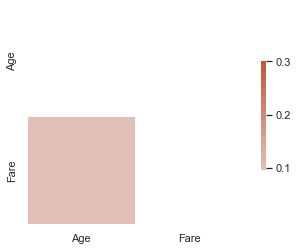

In [42]:
with sns.axes_style(style="white"):
    corr = df[["Age", "Fare"]].corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots()

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=0.3,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
    )


#### `Age` and `Pclass`

This shows that:
- The age of first class passengers has more variability in but is constrained within a fixed range with no outliers.
- Most of the passenger in the third class are between 20 and 30 years old but there are quite a few outliers.
- Most of the passengers in the second class are between 23 and 36 years old but there are outliers. More interestingly, some outliers are close to zero, indicating that children are more likely to be in the second class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

<Figure size 432x288 with 1 Axes>

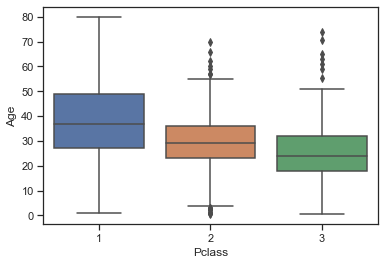

In [43]:
sns.boxplot(data=df, x="Pclass", y="Age")

#### `Age` and `Sex`

The distribution of age between male and females is pretty similar, but there were more old men on board then old women.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

<Figure size 432x288 with 1 Axes>

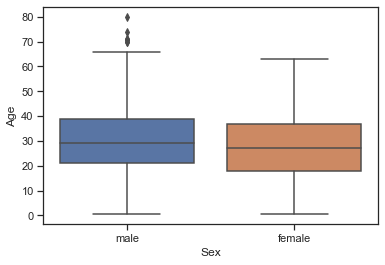

In [44]:
sns.boxplot(data=df, x="Sex", y="Age")

#### `Age` and `Embarked`

Ages with respect to where people embarked from are fairly similarly distributed.

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

<Figure size 432x288 with 1 Axes>

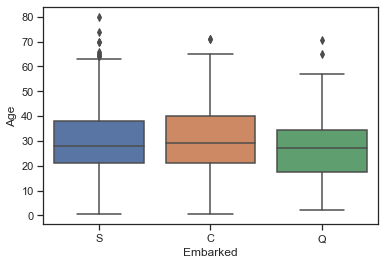

In [45]:
sns.boxplot(data=df, x="Embarked", y="Age")

#### `Fare` and `Pclass`

There is almost no variability in the distribution of fares for second class and third class passengers, but first class passengers do have a small amount of variability. It's also becoming more and more clear that the $512.33 ticket should be treated as an outlier.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

<Figure size 432x288 with 1 Axes>

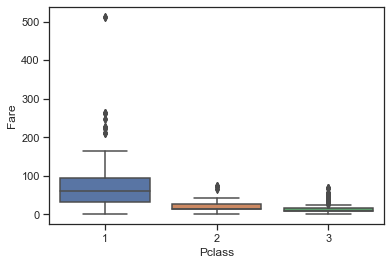

In [46]:
sns.boxplot(data=df, x="Pclass", y="Fare")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

<Figure size 432x288 with 1 Axes>

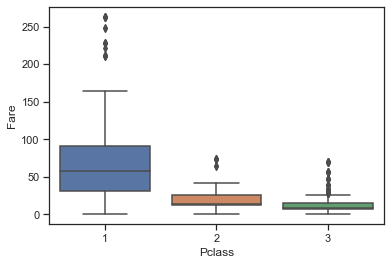

In [47]:
# Drop the three rows which have $512.33 as their fare
temp = df.copy()
temp = temp.drop(temp[temp["Fare"] > 500].index)
sns.boxplot(data=temp, x="Pclass", y="Fare")

#### `Fare` and `Sex`

This shows that:
- On average, women paid higher fares than men.
- There is more variability in the fares paid by women than men.
- There are more outliers in the fares paid by men than in those paid by women.

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

<Figure size 432x288 with 1 Axes>

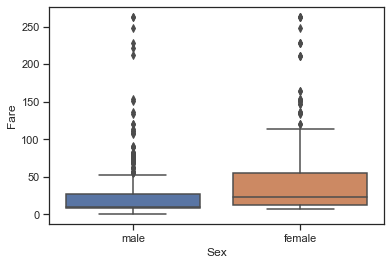

In [48]:
temp = df.copy()
temp = temp.drop(temp[temp["Fare"] > 500].index)

sns.boxplot(data=temp, x="Sex", y="Fare")

#### `Fare` and `Embarked`

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

<Figure size 432x288 with 1 Axes>

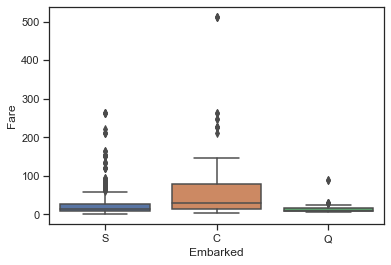

In [49]:
sns.boxplot(data=df, x="Embarked", y="Fare")

### Interaction between `Fare`, `Pclass` and `Survived`

<seaborn.axisgrid.FacetGrid object at 0x7ff34757a6d0>

<Figure size 648x216 with 3 Axes>

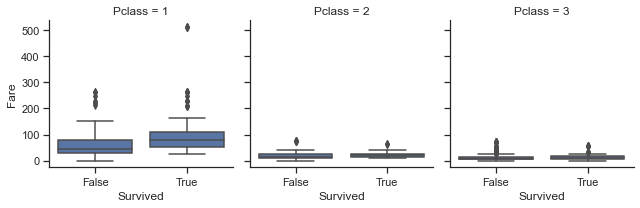

In [50]:
g = sns.FacetGrid(data=df, col="Pclass", margin_titles=True)
g.map(sns.boxplot, "Survived", "Fare", order=[False, True])